<a href="https://colab.research.google.com/github/swetha-rrr/2348567/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.api import OLS

In [ ]:
data = pd.read_csv('/content/insurance.csv')


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
rss = np.sum(np.square(y_test - y_pred))


In [ ]:
explained_variance = 1 - (rss / np.sum(np.square(y_test - np.mean(y_test))))


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)
print("Residual Sum of Squares (RSS):", rss)
print("Explained Variance Score:", explained_variance)

Mean Absolute Error (MAE): 4186.508898366433
Mean Squared Error (MSE): 33635210.431178406
Root Mean Squared Error (RMSE): 5799.587091438356
R-squared (R2) Score: 0.7833463107364539
Adjusted R-squared Score: 0.7783657661556826
Residual Sum of Squares (RSS): 9014236395.555813
Explained Variance Score: 0.7833463107364539


In [ ]:
X_train_ols = X_train.copy()
X_train_ols = np.column_stack([np.ones(X_train_ols.shape[0]), X_train_ols])
model_ols = OLS(y_train, X_train_ols).fit()
print("OLS Summary:")
print(model_ols.summary())

OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.71e-308
Time:                        17:41:21   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.195e+04   1086.938    -10

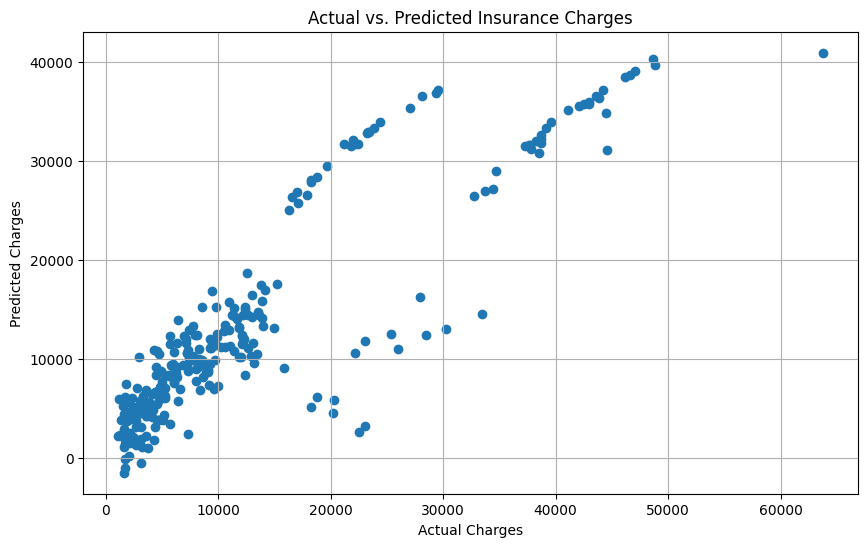

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.grid(True)
plt.show()

Feature Importances:
smoker: 23647.818096084593
children: 425.09145595294973
bmi: 335.78149099435694
region: -271.2842660101493
age: 257.0562636444156
sex: -18.791456698903744
The most influential factor affecting medical insurance costs is smoking status.
Recommendation: Quit smoking to reduce insurance costs.


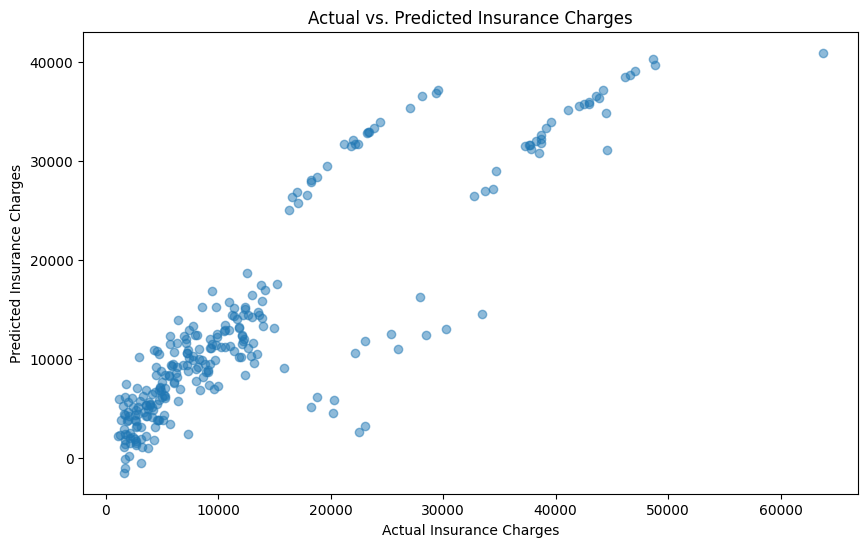

In [ ]:
# Feature importances
feature_importances = model.coef_

# Get the absolute feature importances and sort them in descending order
absolute_feature_importances = abs(feature_importances)
sorted_indices = absolute_feature_importances.argsort()[::-1]

# List of feature names
feature_names = X_train.columns

# Print feature importances in descending order
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

# Find the most influential feature
most_influential_feature = feature_names[sorted_indices[0]]

# Provide recommendations based on the most influential feature
if most_influential_feature == "smoker":
    print("The most influential factor affecting medical insurance costs is smoking status.")
    print("Recommendation: Quit smoking to reduce insurance costs.")
elif most_influential_feature == "age":
    print("The most influential factor affecting medical insurance costs is age.")
    print("Recommendation: Maintain a healthy lifestyle as you age to reduce insurance costs.")
# Add more recommendations for other influential features as needed

# Scatterplot of actual vs. predicted insurance charges
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.show()


for understanding based on correlation

There is a positive correlation between actual and predicted insurance charges.
Recommendation: As your actual insurance charges increase, be prepared for higher predicted charges.


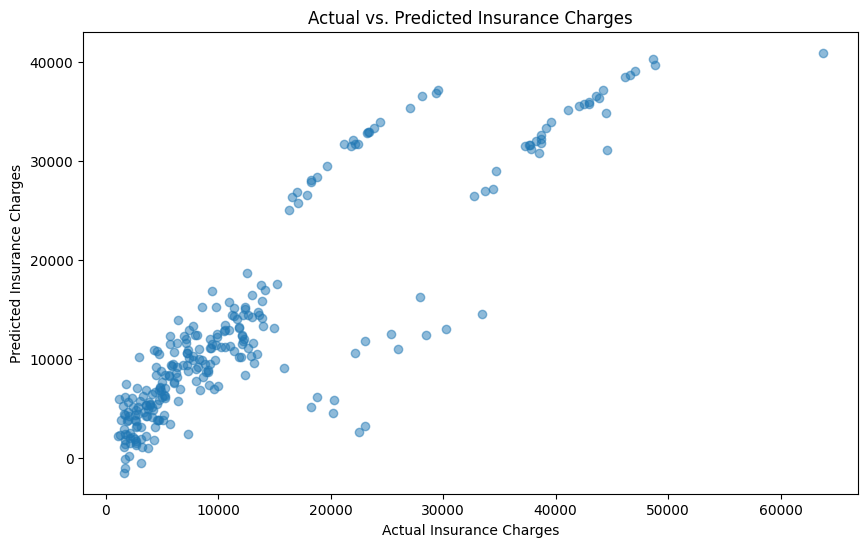

In [ ]:
# Scatterplot of actual vs. predicted insurance charges
import matplotlib.pyplot as plt

# Predict insurance charges on the test set
y_pred = model.predict(X_test)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Insurance Charges")
plt.ylabel("Predicted Insurance Charges")
plt.title("Actual vs. Predicted Insurance Charges")

# Calculate the correlation between actual and predicted insurance charges
correlation = np.corrcoef(y_test, y_pred)[0, 1]

# Provide general recommendations based on correlation
if correlation > 0:
    print("There is a positive correlation between actual and predicted insurance charges.")
    print("Recommendation: As your actual insurance charges increase, be prepared for higher predicted charges.")
elif correlation < 0:
    print("There is a negative correlation between actual and predicted insurance charges.")
    print("Recommendation: As your actual insurance charges increase, predicted charges may decrease.")
else:
    print("There is no strong linear correlation between actual and predicted insurance charges.")
    print("Recommendation: Continue to monitor your insurance costs and make informed decisions.")

plt.show()
